In [1]:
import pandas as pd

In [2]:
infile = pd.read_excel("Istanbul.xlsx")

In [3]:
boylam = infile['Boylam'].values.tolist()
enlem = infile['Enlem'].values.tolist()
talep = infile['Talep'].values.tolist()

In [4]:
import networkx as nx

In [5]:
import matplotlib.pyplot as plt

In [6]:
n1 = 7
n2 = 925
G = nx.complete_bipartite_graph(n1,n2)

In [7]:
my_pos = { i : ( boylam[i], enlem[i] ) for i in G.nodes }

In [8]:
# for convenience, suppose that distances are Euclidean
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

n1 = 7
n2 = 925

c = dict()

for i in range(n1):
    for j in range(n1, n1 + n2):
        (x1,y1) = my_pos[i]
        (x2,y2) = my_pos[j]
        c[i,j] = eucl_dist(x1,y1,x2,y2)

In [9]:
import gurobipy as gp
from gurobipy import GRB

In [10]:
# create model
m = gp.Model()
# define variables
x = m.addVars( n1, range(n1, n1 + n2), vtype=GRB.BINARY )  # x[i,j] = 1 if site i covers landmark j
y = m.addVars( n1, vtype=GRB.BINARY )             # y[i] = 1 if an ambulance is sited at i
z = m.addVar()  

# Objective: minimize the worst-case response time
m.setObjective( z, GRB.MINIMIZE )

# Constraint: site k ambulances
 #m.addConstr( gp.quicksum(y) == 3 )
# Constraints: cover each landmark j by one ambulance
m.addConstrs( gp.quicksum( x[i,j] for i in range(n1) ) == 1 for j in range(n1, n1 + n2))
# Constraints: if no ambulance placed at site i, it can't cover any landmarks
m.addConstrs( x[i,j] <= y[i] for i in range(n1) for j in range(n1, n1 + n2))
# Constraints: response time for landmark j <= worst-case response time
m.addConstrs( gp.quicksum(talep[j] * c[i,j] * x[i,j] for j in range(n1, n1 + n2) ) <= z for i in range(n1) )
m.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-05-28
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (win64)
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads
Optimize a model with 7407 rows, 6483 columns and 25907 nonzeros
Model fingerprint: 0xe952aeea
Variable types: 1 continuous, 6482 integer (6482 binary)
Coefficient statistics:
  Matrix range     [4e-07, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 0.1962855
Presolve removed 6475 rows and 7 columns
Presolve time: 0.02s
Presolved: 932 rows, 6476 columns, 12957 nonzeros
Variable types: 1 continuous, 6475 integer (6475 binary)

Root relaxation: objective 3.353733e-02, 2137 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0 

[(0, 54), (0, 64), (0, 65), (0, 66), (0, 67), (0, 68), (0, 69), (0, 70), (0, 72), (0, 73), (0, 74), (0, 75), (0, 76), (0, 77), (0, 78), (0, 79), (0, 80), (0, 81), (0, 82), (0, 83), (0, 84), (0, 85), (0, 86), (0, 87), (0, 88), (0, 89), (0, 90), (0, 91), (0, 92), (0, 93), (0, 94), (0, 95), (0, 96), (0, 97), (0, 98), (0, 99), (0, 100), (0, 101), (0, 102), (0, 103), (0, 104), (0, 105), (0, 106), (0, 107), (0, 108), (0, 109), (0, 110), (0, 111), (0, 112), (0, 113), (0, 114), (0, 115), (0, 116), (0, 117), (0, 118), (0, 119), (0, 120), (0, 121), (0, 132), (0, 133), (0, 135), (0, 136), (0, 137), (0, 138), (0, 139), (0, 140), (0, 141), (0, 142), (0, 220), (0, 327), (0, 328), (0, 329), (0, 330), (0, 331), (0, 332), (0, 333), (0, 334), (0, 335), (0, 336), (0, 337), (0, 338), (0, 339), (0, 340), (0, 341), (0, 342), (0, 345), (0, 367), (0, 374), (0, 380), (0, 393), (0, 407), (0, 408), (0, 409), (0, 412), (0, 414), (0, 415), (0, 418), (0, 419), (0, 421), (0, 425), (0, 428), (0, 432), (0, 439), (0, 4

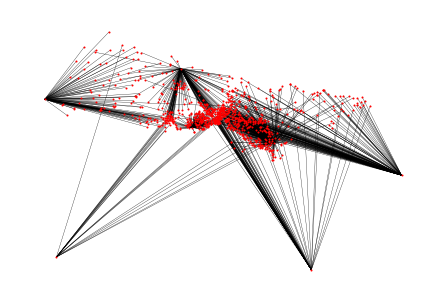

In [11]:
tour_edges = [ (i,j) for i in range (n1) for j in range (n1, n1 + n2) if x[i,j].x > 0.5 ]
print(tour_edges)
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos, node_color='red', node_size=1, width=0.3)
plt.savefig("scenario10.png", dpi=1000)

In [12]:
import matplotlib.pyplot as plt

In [13]:
colors = ['red', 'blue', 'green', 'yellow', 'orange', 'purple', 'brown']

In [14]:
G = nx.Graph()
for j in range(n1, n1 + n2):
    for i in range(n1):
        if x[i, j].x > 0.5:
            color = colors[i]
            G.add_node(j, color=color)
            break

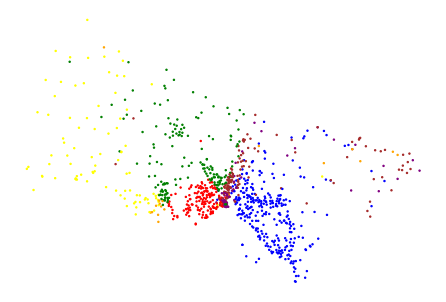

In [15]:
node_colors = [G.nodes[node]['color'] for node in G.nodes()]
nx.draw(G, pos=my_pos, node_color=node_colors, node_size=2, width=0.3)
plt.savefig("ist.png", dpi=1000)